In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [8]:
train_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [11]:
train_df.describe(include="object")

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,58645,58645,58645,58645
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,30594,12271,20984,49943


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [13]:
train_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

<Axes: >

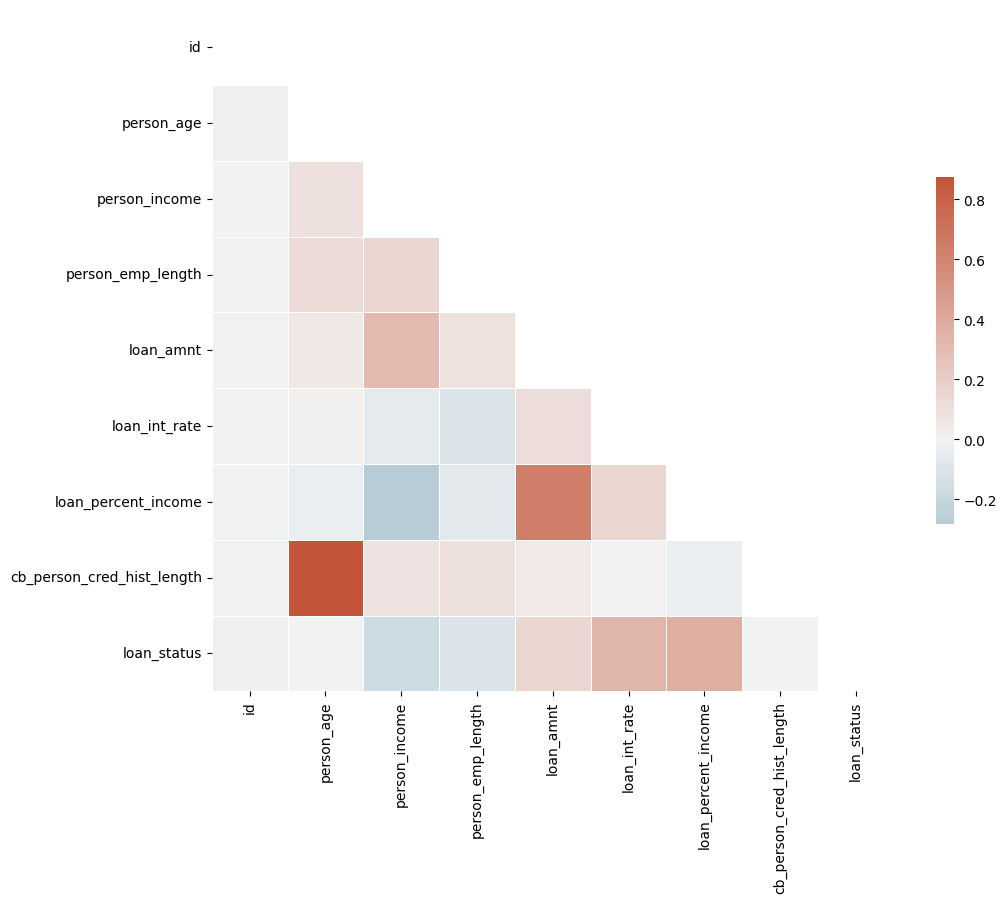

In [15]:
# correlations
# TODO: use distance correlation
corr = train_df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

examples with larger interest rate and larger income percent tend to land loan more often

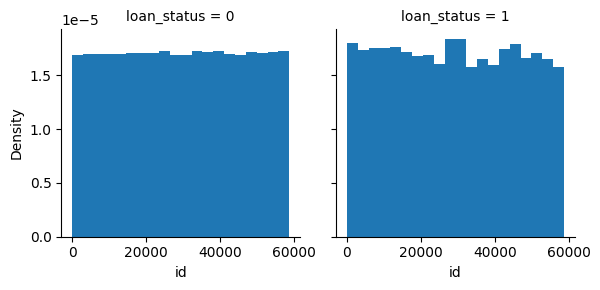

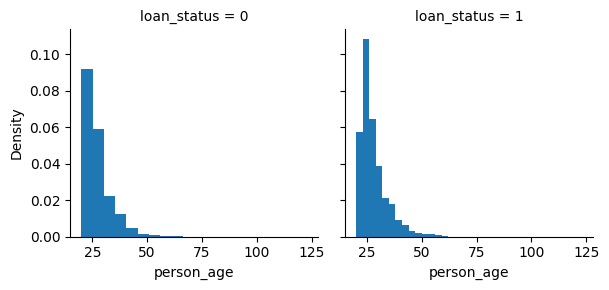

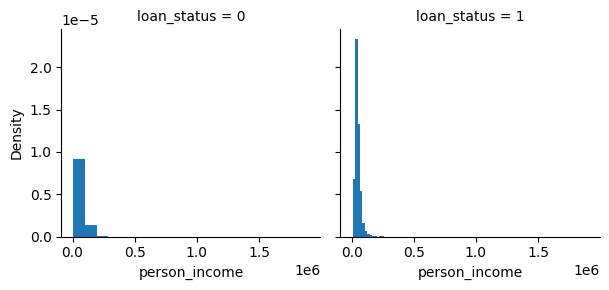

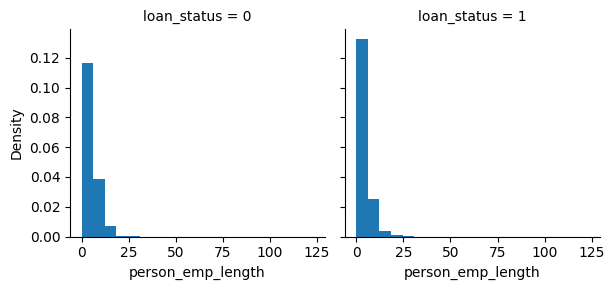

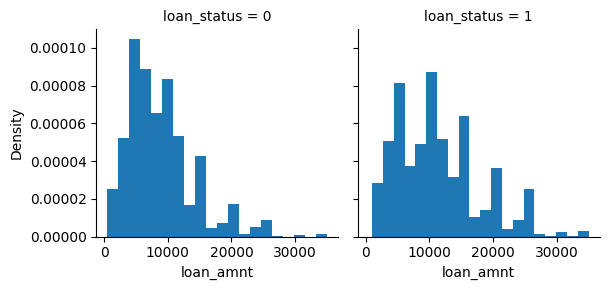

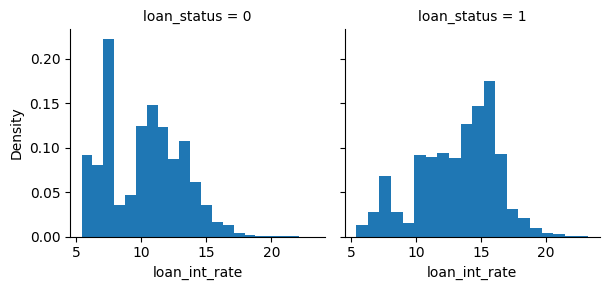

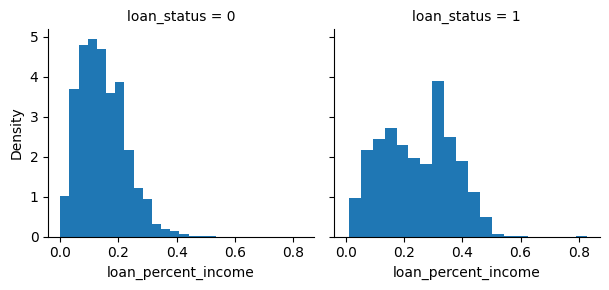

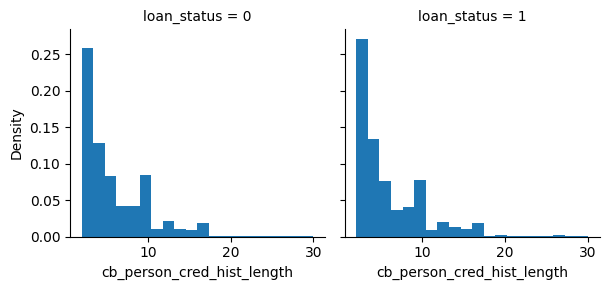

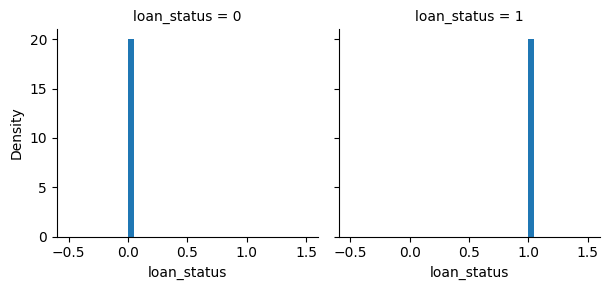

In [20]:
for column in train_df.select_dtypes(include=['int64','float64']).columns.tolist():
    g = sns.FacetGrid(train_df, col='loan_status', sharey=False)  # sharey=False allows different scales for each plot
    g.map(plt.hist, column, bins=20, density=True)  # Use density=True to normalize the histogram
    g.set_axis_labels(column, 'Density') 

loan grade and home_ownership aswell as intent do affect the load outcome

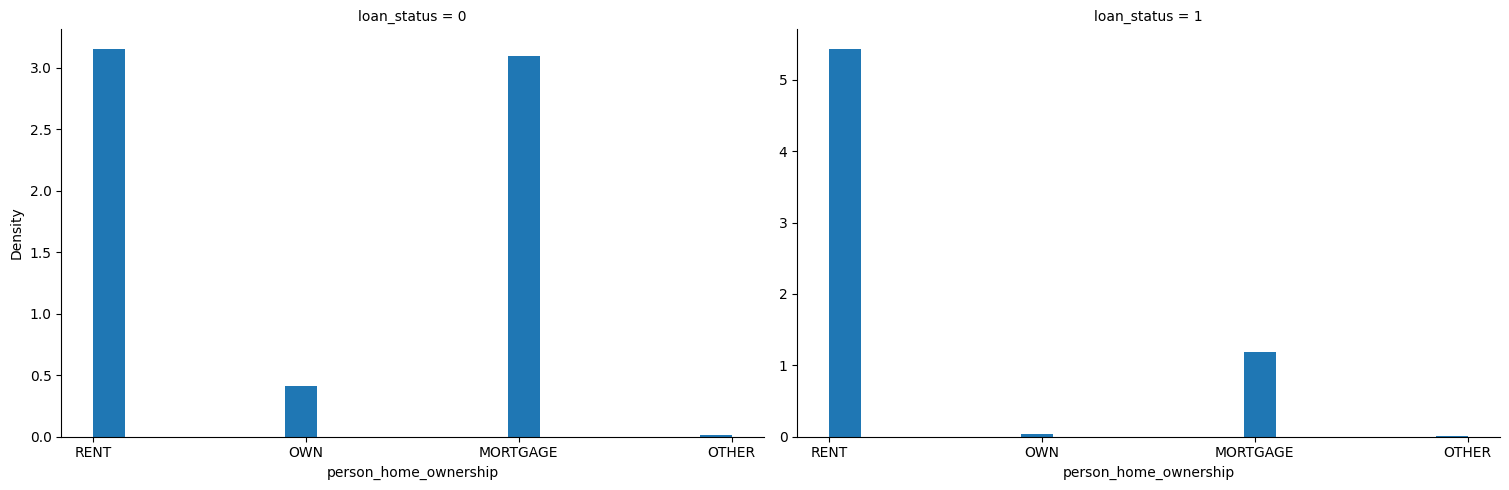

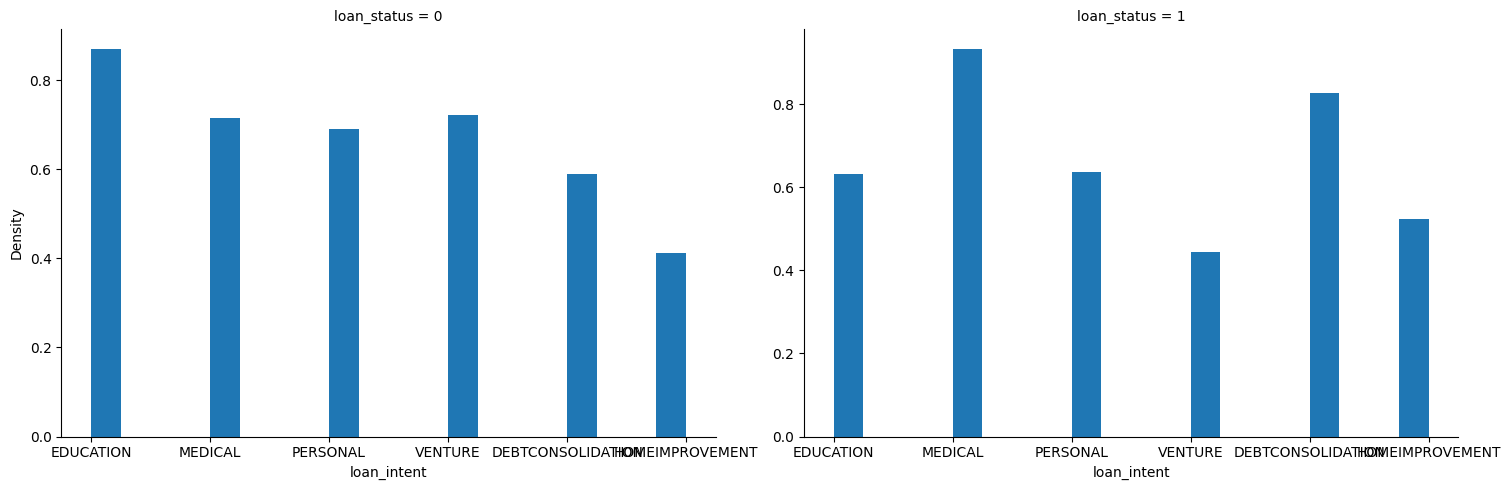

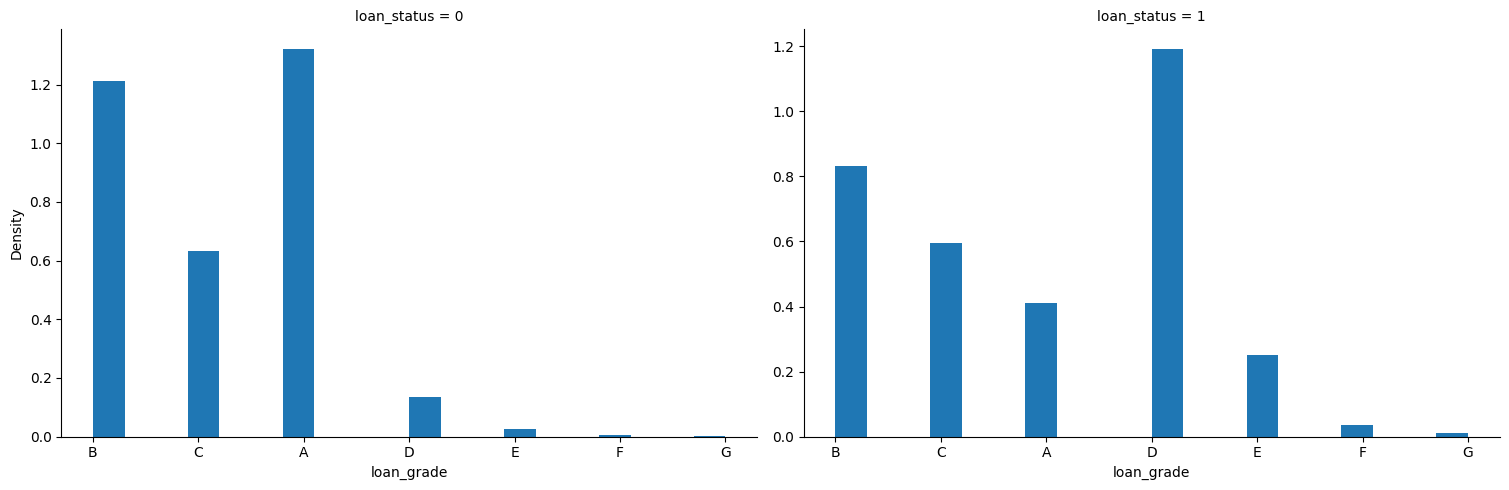

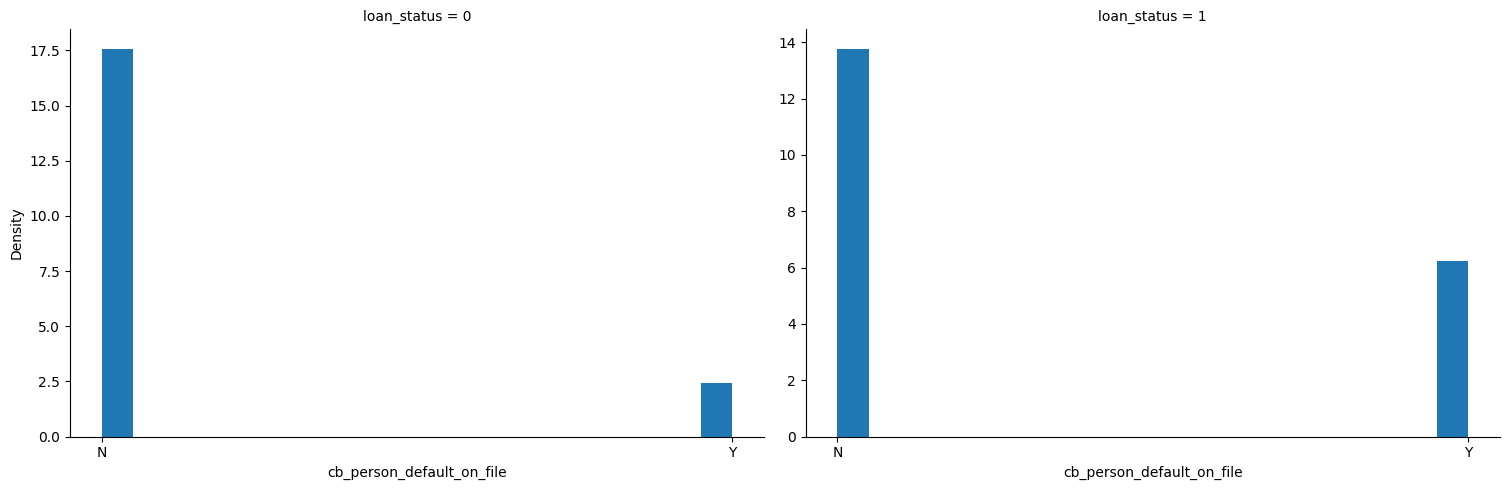

In [29]:
for column in train_df.select_dtypes(exclude=['int64','float64']).columns.tolist():
    g = sns.FacetGrid(train_df, col='loan_status', sharey=False, height=5, aspect=1.5)  # sharey=False allows different scales for each plot
    g.map(plt.hist, column, bins=20, density=True)  # Use density=True to normalize the histogram
    g.set_axis_labels(column, 'Density') 

In [40]:
# one hot encoding for person_home_ownership and loan_intent since they are nominal
# ordinal encoding for loan_grade since this column has natural order
# binary encoding for cb_person_default_on_file since there are only two values
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

onehot_cols = ['person_home_ownership', 'loan_intent']
ordinal_col = 'loan_grade'
binary_col = 'cb_person_default_on_file'

# one hot
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(train_df[onehot_cols].values)
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_cols))

# ordinal
ordinal_encoder = OrdinalEncoder(categories=[['C', 'B', 'A', 'D', 'E', 'F', 'G']]) 
train_df['loan_grade_encoded'] = ordinal_encoder.fit_transform(train_df[[ordinal_col]])

# binary
train_df['cb_person_default_on_file_encoded'] = train_df[binary_col].map({'Y': 1, 'N': 0})

# concat
train_df_encoded = pd.concat([train_df, onehot_df], axis=1)
train_df_encoded.drop(columns=onehot_cols + [ordinal_col, binary_col], inplace=True)

train_df_encoded.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,loan_grade_encoded,cb_person_default_on_file_encoded,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,37,35000,0.0,6000,11.49,0.17,14,0,1.0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,22,56000,6.0,4000,13.35,0.07,2,0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,29,28800,8.0,6000,8.90,0.21,10,0,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,30,70000,14.0,12000,11.11,0.17,5,0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,22,60000,2.0,6000,6.92,0.10,3,0,2.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<Axes: >

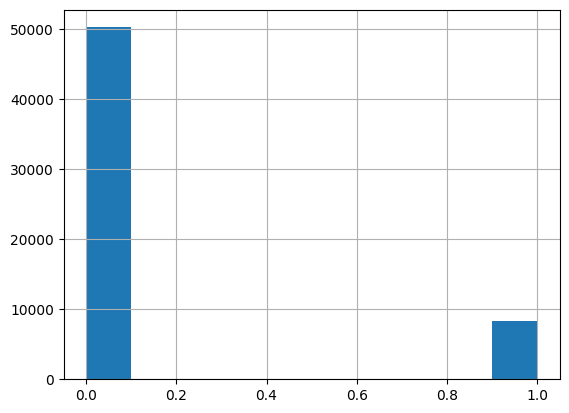

In [41]:
# not balanced dataset
train_df_encoded['loan_status'].hist()

In [42]:
train_df_encoded.to_csv('data/train_encoded.csv', index=False)